# Vega Lite Examples in Haskell

The aim of this notebook is to use 
[`hvega`](http://hackage.haskell.org/package/hvega) - which is a Haskell
port of the 
[Elm Vega](http://package.elm-lang.org/packages/gicentre/elm-vega/2.2.1) 
module (note, this is a link to an old version) - to describe
the [Vega-Lite Gallery](https://vega.github.io/vega-lite/examples/)
in an IHaskell notebook. I used ot have a single notebook with all the
examples in it, but I have since split it out into multiple
notebooks, called `VegaLiteGallery-XXXX.ipynb`. This notebook remains
to explain how to load `hvega` and describes how the examples are
created.

## Jupyter Lab versus Notebook

Jupyter Lab - which can be run using
[Tweag's jupyterWith environment](https://github.com/tweag/jupyterWith) -
has native support for Vega and Vega-Lite visualizations, and so is
the *preferred* medium for `hvega`. This notebook was run using 
Jupter Lab, with the `shell.nix` file and the command

    nix-shell --command "jupyter lab"

When run using Jupyter notebooks, the visualizations are displayed
using the VegaEmbed JavaScript library, and do not provide a PNG
version for display outside of the browser (e.g. PDF or the various
ipynb viewers).

However, the *current* version (0.2) of `ihaskell-vega`, which provides
the typeclass used to tell IHaskell to automatically display Vega-Lite
visualizations, still defaults to the IPython notebook version, which
is why `vlShow` is used in the examples to display the visualizations.
The plan is to switch (so that notebook users have to use `vlShow` or
an equivalent, and Lab users will not have to do anything) in a future
release.

## Versions

The notebook was last run with version [0.5.0.0 of the `hvega` module](https://hackage.haskell.org/package/hvega).
This version supports version 4 of the Vega-Lite specification. Hopefully it is (mostly) forwards-compatible!

## Let's load up Vega-Lite

Since many of the strings used in `hvega` are actually `Data.Text.Text`,
we turn on `OverloadedStrings`.

In [1]:
:ext OverloadedStrings

In [2]:
-- VegaLite uses these names
import Prelude hiding (filter, lookup, repeat)

import Graphics.Vega.VegaLite

-- IHaskell automatically imports this if the `ihaskell-vega` module is installed
-- import IHaskell.Display.Hvega

The following imports are only to show the JSON representation of a Vega-Lite
visualization, and are not needed in "general" use of `hvega`.

In [3]:
import Data.Aeson.Encode.Pretty (encodePretty)
import Data.ByteString.Lazy.Char8 as BL8 hiding (filter, map, repeat)

-- Allow the VegaLite specification to be pretty-printed
ppSpec = BL8.putStrLn . encodePretty . fromVL

-- If you are viewing this in an IHaskell notebook rather than Jupyter Lab,
-- use the following to see the visualizations
--
-- vlShow = id

As of version 0.3, there are now `toHtml` and `toHtmlFile` routines which create
a HTML representation of the visualization - using Vega Embed as the viewer (this is
similar to how the visualizations for notebooks is handled by `ihaskell-vega`).

In [4]:
:type toHtml

toHtml :: VegaLite -> Text

---

## Simple Bar Chart

From https://vega.github.io/vega-lite/examples/bar.html

```
{
  "$schema": "https://vega.github.io/schema/vega-lite/v4.json",
  "description": "A simple bar chart with embedded data.",
  "data": {
    "values": [
      {"a": "A","b": 28}, {"a": "B","b": 55}, {"a": "C","b": 43},
      {"a": "D","b": 91}, {"a": "E","b": 81}, {"a": "F","b": 53},
      {"a": "G","b": 19}, {"a": "H","b": 87}, {"a": "I","b": 52}
    ]
  },
  "mark": "bar",
  "encoding": {
    "x": {"field": "a", "type": "ordinal"},
    "y": {"field": "b", "type": "quantitative"}
  }
}
```

In [5]:
barFromColumns :: VegaLite
barFromColumns = 
    let desc = description "A simple bar chart with embedded data."
        dvals = dataFromColumns []
               . dataColumn "a" (Strings ["A", "B", "C", "D", "E", "F", "G", "H", "I"])
               . dataColumn "b" (Numbers [28, 55, 43, 91, 81, 53, 19, 87, 52])
         
        enc = encoding
              . position X [PName "a", PmType Ordinal]
              . position Y [PName "b", PmType Quantitative]

    in toVegaLite [desc, dvals [], mark Bar [], enc []]

The specification can be displayed, since it is "just" JSON:

In [6]:
ppSpec barFromColumns

{
    "mark": "bar",
    "data": {
        "values": [
            {
                "a": "A",
                "b": 28
            },
            {
                "a": "B",
                "b": 55
            },
            {
                "a": "C",
                "b": 43
            },
            {
                "a": "D",
                "b": 91
            },
            {
                "a": "E",
                "b": 81
            },
            {
                "a": "F",
                "b": 53
            },
            {
                "a": "G",
                "b": 19
            },
            {
                "a": "H",
                "b": 87
            },
            {
                "a": "I",
                "b": 52
            }
        ]
    },
    "$schema": "https://vega.github.io/schema/vega-lite/v4.json",
    "encoding": {
        "x": {
            "field": "a",
            "type": "ordinal"
        },
        "y": {
            "field": "b",
           

The `toHtml` function creates the following HTML "snippet" from the visualization (`toHtmlFile` will write it to a file). These functions were added in version `0.2.1.0`.

In [7]:
toHtml barFromColumns

"<!DOCTYPE html>\n<html>\n<head>\n  <script src=\"https://cdn.jsdelivr.net/npm/vega@5\"></script>\n  <script src=\"https://cdn.jsdelivr.net/npm/vega-lite@4\"></script>\n  <script src=\"https://cdn.jsdelivr.net/npm/vega-embed\"></script>\n</head>\n<body>\n<div id=\"vis\"></div>\n<script type=\"text/javascript\">\n  var spec = {\"mark\":\"bar\",\"data\":{\"values\":[{\"a\":\"A\",\"b\":28},{\"a\":\"B\",\"b\":55},{\"a\":\"C\",\"b\":43},{\"a\":\"D\",\"b\":91},{\"a\":\"E\",\"b\":81},{\"a\":\"F\",\"b\":53},{\"a\":\"G\",\"b\":19},{\"a\":\"H\",\"b\":87},{\"a\":\"I\",\"b\":52}]},\"$schema\":\"https://vega.github.io/schema/vega-lite/v4.json\",\"encoding\":{\"x\":{\"field\":\"a\",\"type\":\"ordinal\"},\"y\":{\"field\":\"b\",\"type\":\"quantitative\"}},\"description\":\"A simple bar chart with embedded data.\"};\n  vegaEmbed('#vis', spec).then(function(result) {\n  // Access the Vega view instance (https://vega.github.io/vega/docs/api/view/) as result.view\n  }).catch(console.error);\n</script>\n</

Now use Vega-Embed to view the visualization directly.

This should be viewable as a PNG when viewing with a non-Javascript enabled viewer, at least for notebooks processed by Jupyter Lab, but appears to fail with IHaskell notebooks.

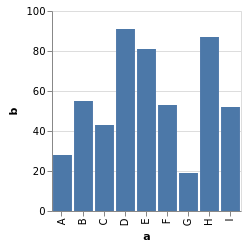

In [8]:
vlShow barFromColumns

The data can also be created using `dataFromRows`, as shown below:

In [9]:
barFromRows = 
    let desc = description "A simple bar chart with embedded data."
        dvals = dataFromRows []
                   . dataRow [("a", Str "A"), ("b", Number 28)]
                   . dataRow [("a", Str "B"), ("b", Number 55)]
                   . dataRow [("a", Str "C"), ("b", Number 43)]
                   . dataRow [("a", Str "D"), ("b", Number 91)]
                   . dataRow [("a", Str "E"), ("b", Number 81)]
                   . dataRow [("a", Str "F"), ("b", Number 53)]
                   . dataRow [("a", Str "G"), ("b", Number 19)]
                   . dataRow [("a", Str "H"), ("b", Number 87)]
                   . dataRow [("a", Str "I"), ("b", Number 52)]

        enc = encoding
                . position X [PName "a", PmType Ordinal]
                . position Y [PName "b", PmType Quantitative]

    in toVegaLite [desc, dvals [], mark Bar [], enc []]

Are the two sepcifications correct (there is currently no `Eq` instance defined for the `VegaLite`
type so the underlying JSON representation is extracted using `fromVL`)?

In [10]:
fromVL barFromColumns == fromVL barFromRows

True

An important piece of information is the expected specification, given on the Vega-Lite example page. I use the
Aeson Template-Haskell support to embed the specification as a Haskell value (I have taken to using the
suffix `Spec` for the variable name). So for this example we have

In [11]:
:ext QuasiQuotes

In [12]:
import Data.Aeson.QQ.Simple (aesonQQ)

barSpec = [aesonQQ|
{
  "$schema": "https://vega.github.io/schema/vega-lite/v4.json",
  "description": "A simple bar chart with embedded data.",
  "data": {
    "values": [
      {"a": "A","b": 28}, {"a": "B","b": 55}, {"a": "C","b": 43},
      {"a": "D","b": 91}, {"a": "E","b": 81}, {"a": "F","b": 53},
      {"a": "G","b": 19}, {"a": "H","b": 87}, {"a": "I","b": 52}
    ]
  },
  "mark": "bar",
  "encoding": {
    "x": {"field": "a", "type": "ordinal"},
    "y": {"field": "b", "type": "quantitative"}
  }
}
|]

This can then be compared to the output of `toVegaLite`:

In [13]:
fromVL barFromRows == barSpec

True

In the gallery example I use a more-complicated validation function, defined in each notebook
and cleverly named `validate`, which will report - in a hopefully-readable
manner - any differences between the expected and created specification. There are several differences why there may be a difference,
such as

  - at the time I created the example, the gallery was using an old (pre version 3) version of the Vega-Lite specification
    (whereas now the examples are using a newer version, but I haven't updated them)
    
  - Vega-Lite is a "flexible" schema, in that there's often more-than-one-way to define the same thing (for example,
    setting a value to `""` or `null` can often mean the same thing, and some settings are optional
    
  - `hvega` doesn't support one form of creating a visualization (normally a simpler, short cut) but you can create
    the same visualization
    
  - actual bugs or missing functionality in `hvega`: [issues welcome](https://github.com/DougBurke/hvega/issues)
  
---

If you are looking for the actual notebooks, then look for

  - `VegaLiteGallery-SingleViewPlots.ipynb` [nbviewer link](https://nbviewer.jupyter.org/github/DougBurke/hvega/blob/master/notebooks/VegaLiteGallery-SingleViewPlots.ipynb)
  
  - `VegaLiteGallery-CompositeMark.ipynb` [nbviewer link](https://nbviewer.jupyter.org/github/DougBurke/hvega/blob/master/notebooks/VegaLiteGallery-CompositeMark.ipynb)
  
  - `VegaLiteGallery-LayeredPlots.ipynb` [nbviewer link](https://nbviewer.jupyter.org/github/DougBurke/hvega/blob/master/notebooks/VegaLiteGallery-LayeredPlots.ipynb)
  
  - `VegaLiteGallery-MultiView.ipynb` [nbviewer link](https://nbviewer.jupyter.org/github/DougBurke/hvega/blob/master/notebooks/VegaLiteGallery-MultiView.ipynb)
  
  - `VegaLiteGallery-Maps.ipynb` [nbviewer link](https://nbviewer.jupyter.org/github/DougBurke/hvega/blob/master/notebooks/VegaLiteGallery-Maps.ipynb)
  
  - `VegaLiteGallery-Interactive.ipynb` [nbviewer link](https://nbviewer.jupyter.org/github/DougBurke/hvega/blob/master/notebooks/VegaLiteGallery-Interactive.ipynb)
  
---